# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy Grassmann class to
* project points onto the Grassmann manifold;
* calculate the pairwise distances;
* compute the affinity matrix.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

from UQpy.DimensionReduction import DiffusionMaps 

Generate `npts` matrices to serve as input points.

In [12]:
np.random.seed(111)
npts=1000
pts = np.random.rand(npts, 2)

a0 = 0
a1 = 1
b0 = 0
b1 = 1

nodes = np.zeros(np.shape(pts))

nodes[:,0]=pts[:,0]*(a1-a0)+a0
nodes[:,1]=pts[:,1]*(b1-b0)+b0

ns=40

x=np.linspace(0,1,ns)
samples = []
for i in range(npts):

    M = np.zeros((ns,ns))
    for k in range(ns):
        f=np.sin(0.1*k*np.pi*nodes[i,0]*x+2*np.pi*nodes[i,1])
        M[:,k] = f

    samples.append(M)

Plot the coordinates of each point in the Euclidean space and plot two distinct points.

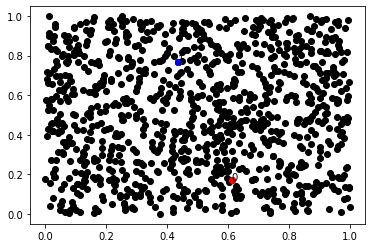

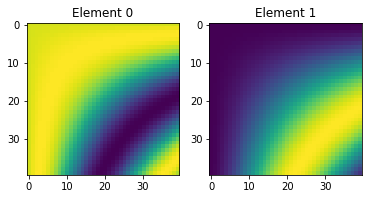

In [13]:
plt.plot(nodes[:,0],nodes[:,1],'ko')
plt.plot(nodes[0,0],nodes[0,1],'ro')
plt.plot(nodes[1,0],nodes[1,1],'bo')
plt.text(nodes[0,0],nodes[0,1], '0')
plt.text(nodes[1,0],nodes[1,1], '1')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(samples[0])
ax1.title.set_text('Element 0')
ax2.imshow(samples[1])
ax2.title.set_text('Element 1')


Instantiate the ``UQpy`` class ``DiffusionMaps`` and compute the diffusion coordinates using the method ``mapping``.

In [14]:
dfm = DiffusionMaps(alpha=0.5, n_evecs=10,kernel_object=DiffusionMaps.gaussian_kernel)
diff_coords, evals, evecs = dfm.mapping(data=samples)

Plot the diffusion coordinates and the points presented above.

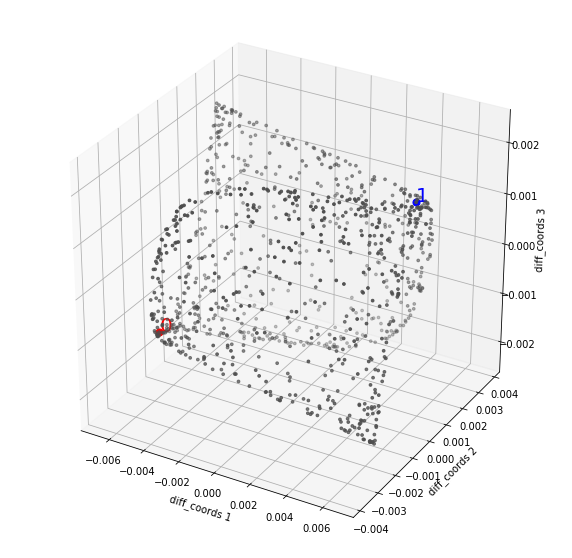

In [15]:
p0 = 1
p1 = 2
p2 = 3

fig = plt.figure(num=None, figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(diff_coords[:,p0], diff_coords[:,p1], diff_coords[:,p2], c=[[0.3,0.3,0.3]], cmap=plt.cm.Spectral, s=30, marker='.')
ax.scatter(diff_coords[0,p0], diff_coords[0,p1], diff_coords[0,p2], c='r', cmap=plt.cm.Spectral, s=50)
ax.scatter(diff_coords[1,p0], diff_coords[1,p1], diff_coords[1,p2], c='b', cmap=plt.cm.Spectral, s=50)
ax.text(diff_coords[0,p0],diff_coords[0,p1],diff_coords[0,p2], '%s' % (str(0)), size=20, zorder=1,color='r')
ax.text(diff_coords[1,p0],diff_coords[1,p1],diff_coords[1,p2], '%s' % (str(1)), size=20, zorder=1,color='b')
ax.set_xlabel('diff_coords 1')
ax.set_ylabel('diff_coords 2')
ax.set_zlabel('diff_coords 3')
plt.show()